In [3]:
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(f'{os.getcwd()}/臺北捷運每日分時各站OD流量統計資料_202310.csv')

In [70]:
df.head(3)

,日期,時段,進站,出站,人次
0,2023-10-01,0,松山機場,松山機場,0
1,2023-10-01,0,松山機場,中山國中,0
2,2023-10-01,0,松山機場,南京復興,0


In [71]:
gongguan_entry = df[df['進站']=='公館']
gongguan_left = df[df['出站']=='公館']

In [134]:
def resampledata(data):
    grouped_data = data.groupby(['時段', '日期']).agg({'人次': 'sum'}).reset_index()
    grouped_data = grouped_data.sort_values(by=['日期', '時段'])
    grouped_data['日期時段'] = pd.to_datetime(grouped_data['日期'] + ' ' + grouped_data['時段'].astype(str) + ':00:00')
    grouped_data = grouped_data.drop(columns=['時段', '日期'])

    grouped_data.set_index('日期時段', inplace=True)
    grouped_data = grouped_data.rename_axis(None)
    resample_data = grouped_data.resample('10T').mean()

    resample_data['人次'] = resample_data['人次'].ffill()
    resample_data['人次'] = resample_data['人次'].astype(float)

    resample_data['人次'] = resample_data['人次'].apply(lambda x: round(x / 6))

    return resample_data

In [135]:
resample_entry = resampledata(gongguan_entry)
resample_entry = resample_entry.rename(columns={'人次': '進站人次'})
resample_entry

,進站人次
2023-10-01 00:00:00,25
2023-10-01 00:10:00,25
2023-10-01 00:20:00,25
2023-10-01 00:30:00,25
2023-10-01 00:40:00,25
...,...
2023-10-31 22:20:00,327
2023-10-31 22:30:00,327
2023-10-31 22:40:00,327
2023-10-31 22:50:00,327


In [136]:
resample_left = resampledata(gongguan_left)
resample_left = resample_left.rename(columns={'人次': '出站人次'})
resample_left

,出站人次
2023-10-01 00:00:00,49
2023-10-01 00:10:00,49
2023-10-01 00:20:00,49
2023-10-01 00:30:00,49
2023-10-01 00:40:00,49
...,...
2023-10-31 22:20:00,142
2023-10-31 22:30:00,142
2023-10-31 22:40:00,142
2023-10-31 22:50:00,142


In [138]:
merged_df = pd.merge(resample_entry, resample_left, left_index=True, right_index=True, how='inner')
merged_df.to_csv('MRT_data.csv')

# Oct-01 Preprocced data visualization

In [154]:
merged_oct01 = merged_df['2023-10-01':'2023-10-01']
merged_oct01_entry  = merged_oct01['進站人次']
merged_oct01_left  = merged_oct01['出站人次']

In [155]:
merged_oct01_entry

2023-10-01 00:00:00    25
2023-10-01 00:10:00    25
2023-10-01 00:20:00    25
2023-10-01 00:30:00    25
2023-10-01 00:40:00    25
                       ..
2023-10-01 23:10:00    68
2023-10-01 23:20:00    68
2023-10-01 23:30:00    68
2023-10-01 23:40:00    68
2023-10-01 23:50:00    68
Freq: 10T, Name: 進站人次, Length: 144, dtype: int64

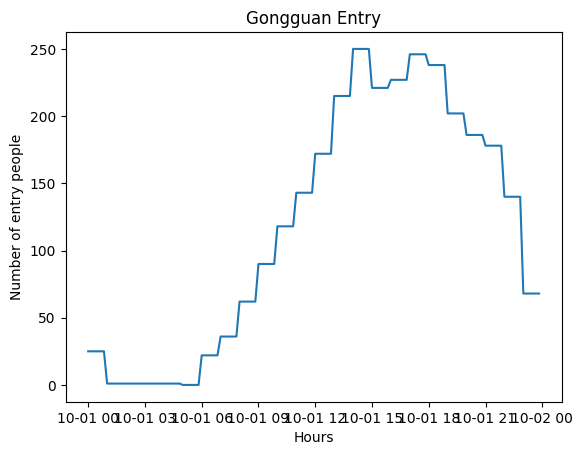

In [ ]:
plt.plot(merged_oct01_entry.index, merged_oct01_entry)

# 添加標題和軸標籤
plt.title('Gongguan Entry')
plt.xlabel('Hours')
plt.ylabel('Number of entry people')

# 顯示圖表
plt.show()

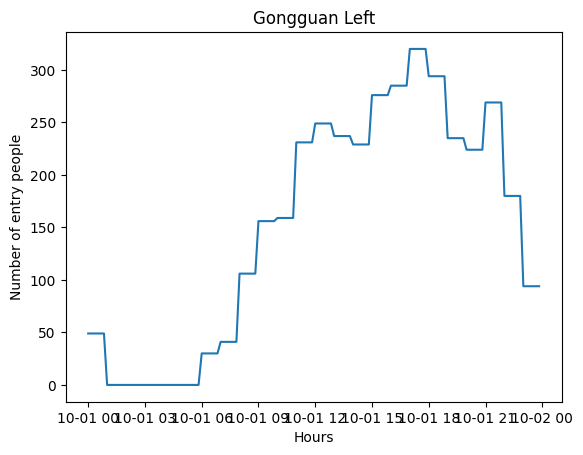

In [158]:
plt.plot(merged_oct01_left.index, merged_oct01_left)

# 添加標題和軸標籤
plt.title('Gongguan Left')
plt.xlabel('Hours')
plt.ylabel('Number of entry people')

# 顯示圖表
plt.show()

# Oct-01 Raw data visualization

In [156]:
oct01_entry = gongguan_entry[gongguan_entry['日期']=='2023-10-01']
oct01_left = gongguan_left[gongguan_left['日期']=='2023-10-01']

In [12]:
oct01_entry

,日期,時段,進站,出站,人次
3348,2023-10-01,0,公館,松山機場,0
3349,2023-10-01,0,公館,中山國中,0
3350,2023-10-01,0,公館,南京復興,1
3351,2023-10-01,0,公館,忠孝復興,0
3352,2023-10-01,0,公館,大安,0
...,...,...,...,...,...
260491,2023-10-01,23,公館,徐匯中學,4
260492,2023-10-01,23,公館,三和國中,2
260493,2023-10-01,23,公館,三重國小,4
260494,2023-10-01,23,公館,迴龍,7


In [17]:
daily_res_ent = oct01_entry['人次'].groupby(oct01_entry['時段']).sum()
daily_res_ent = pd.DataFrame(daily_res_ent)
# daily_res_ent

daily_res_left = oct01_left['人次'].groupby(oct01_left['時段']).sum()
daily_res_left = pd.DataFrame(daily_res_left)
# daily_res_left

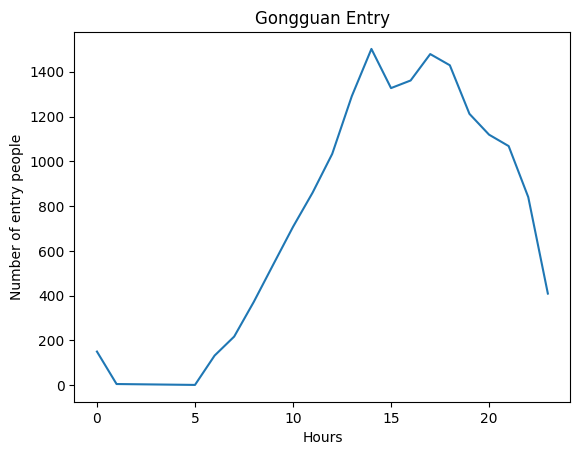

In [153]:
plt.plot(daily_res_ent.index, daily_res_ent['人次'])

# 添加標題和軸標籤
plt.title('Gongguan Entry')
plt.xlabel('Hours')
plt.ylabel('Number of entry people')

# 顯示圖表
plt.show()

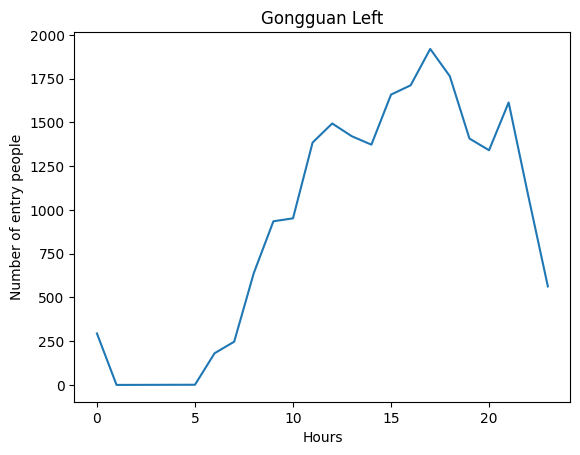

In [57]:
plt.plot(daily_res_left.index, daily_res_left['人次'])

# 添加標題和軸標籤
plt.title('Gongguan Left')
plt.xlabel('Hours')
plt.ylabel('Number of entry people')

# 顯示圖表
plt.show()

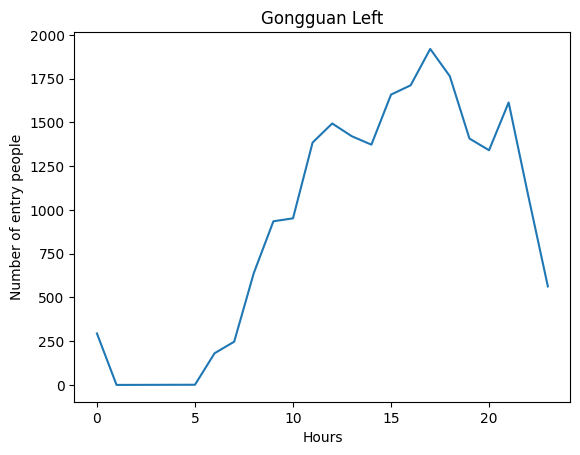

In [ ]:
plt.plot(daily_res_left.index, daily_res_left['人次'])

# 添加標題和軸標籤
plt.title('Gongguan Left')
plt.xlabel('Hours')
plt.ylabel('Number of entry people')

# 顯示圖表
plt.show()